##### Dados Titanic
Quais os fatores que fizeram as pessoas mais propensas a sobreviver?

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skt

%matplotlib inline

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [88]:
data['SexInt'] = 1
data.SexInt[data.Sex == 'female'] = 0


C:\Users\andre.scofano\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B306400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B410278>]], dtype=object)

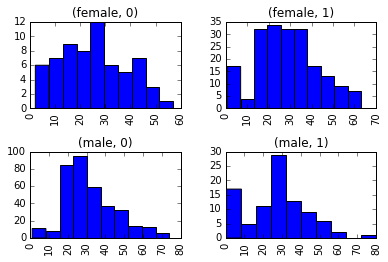

In [62]:
data.Age[data.Age.notnull()].hist(by=[data.Sex,data.Survived])

In [81]:
data[data.Age.notnull()].groupby(['Survived']).describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  424.000000  424.000000   424.000000  424.000000   
         mean    30.626179   22.965456    0.365566   442.299528    2.485849   
         std     14.172110   31.448825    0.878341   264.739548    0.743633   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.895800    0.000000   200.750000    2.000000   
         50%     28.000000   11.887500    0.000000   436.000000    3.000000   
         75%     39.000000   26.550000    0.000000   683.250000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  290.000000  290.000000   290.000000  290.000000   
         mean    28.343690   51.843205    0.527586   457.768966    1.872414   
         std     14.950952   70.458776    0.807147   250.845515    0.836617   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   13.000000    0.000000   260.500000    1.000000   
         50%     28.000000   26.250000    0.000000   452.000000    2.000000   
         75%     36.000000   66.200000    1.000000   669.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                    SexInt       SibSp  
Survived                                
0        count  424.000000  424.000000  
         mean     0.849057    0.525943  
         std      0.358417    1.044760  
         min      0.000000    0.000000  
         25%      1.000000    0.000000  
         50%      1.000000    0.000000  
         75%      1.000000    1.000000  
         max      1.000000    5.000000  
1        count  290.000000  290.000000  
         mean     0.320690    0.493103  
         std      0.467548    0.731132  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      1.000000    1.000000  
         max      1.000000    4.000000

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexInt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [116]:
data.notnull()

data_train_x=data.drop(['Survived','PassengerId','Ticket','Cabin','Sex','Name','Parch','SibSp','Embarked'],axis=1)
data_train_y=data['Survived']

In [118]:
data_train_x.Age=data_train_x['Age'].notnull()
data_train_x.Age


0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17     False
18      True
19     False
20      True
21      True
22      True
23      True
24      True
25      True
26     False
27      True
28     False
29     False
       ...  
861     True
862     True
863    False
864     True
865     True
866     True
867     True
868    False
869     True
870     True
871     True
872     True
873     True
874     True
875     True
876     True
877     True
878    False
879     True
880     True
881     True
882     True
883     True
884     True
885     True
886     True
887     True
888    False
889     True
890     True
Name: Age, dtype: bool

In [104]:
###Testar diferentes métodos
#####Random Forest, Logit, Naive Bayes, SVM

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
forest = RandomForestClassifier(n_estimators = 100)

In [107]:
forest.fit(data_train_x,data_train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').